In [3]:
%pip install tensorflow tensorflow-gpu opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
#Imports
import os
import tensorflow as tf



In [7]:


# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
#Removing the extremely small files (<5KB)

In [8]:
data_dir= 'strike_data'
min_size_kb=5

for label in['true', 'false']:
    folder_path=os.path.join(data_dir, label)

    for filename in os.listdir(folder_path):
        file_path=os.path.join(folder_path, filename)
        
        if os.path.isfile(file_path):
            size_kb=os.path.getsize(file_path)/1024
            if size_kb< min_size_kb:
                print(f"Deleting {file_path} ({size_kb:2f} KB)")
                os.remove(file_path)

            

In [ ]:
#Load Dataset

In [9]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
data= tf.keras.utils.image_dataset_from_directory('strike_data', shuffle=True)

Found 1000 files belonging to 2 classes.


In [46]:
data_iterator=data.as_numpy_iterator()

In [47]:
batch= data_iterator.next()


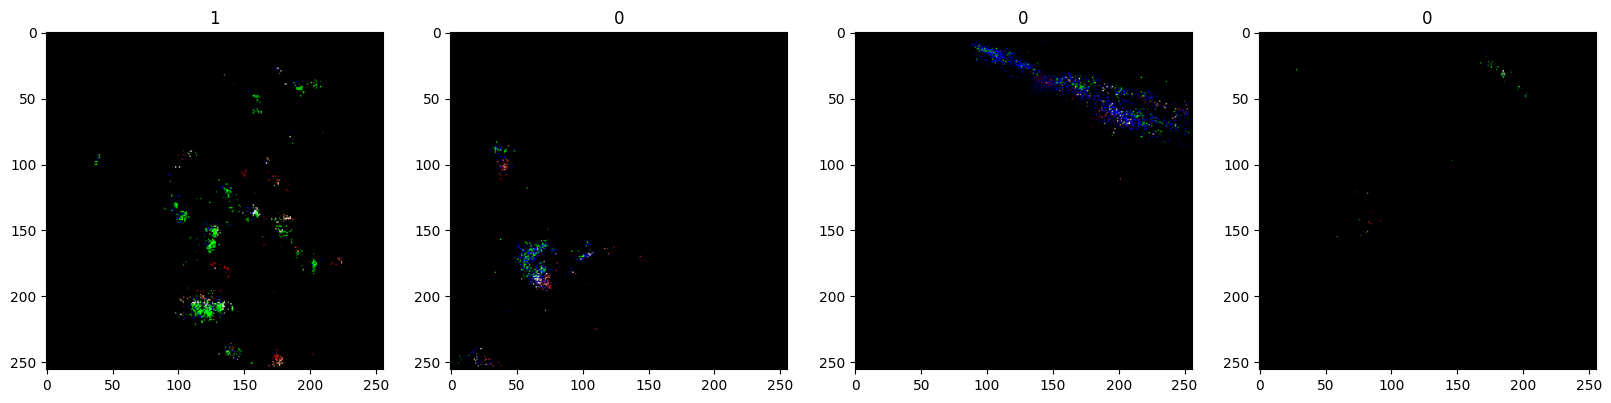

In [48]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [50]:
data_dir = 'strike_data'

In [52]:
data = tf.keras.utils.image_dataset_from_directory(
    'strike_data',
    image_size=(256, 256),
    batch_size=32
)

data = data.map(lambda x, y: (x / 255.0, y))

Found 1000 files belonging to 2 classes.


In [ ]:
#Build the CNN model with input shape and normalization

In [53]:
data.as_numpy_iterator().next() 

(array([[[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         ...,
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
 
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]],
 
 
        [

In [54]:
# 3. Split data into train and validation sets
dataset_size = len(data)
train_size = int(dataset_size * 0.7)
val_size =  dataset_size - train_size

train = data.take(train_size)
val = data.skip(train_size).take(val_size)

In [55]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout # type: ignore

In [56]:
model = Sequential()

In [57]:
#Conv2D-scans with 16 kernels of size 3x3, strides of 1, and ReLU activation function
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

In [58]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [60]:
model.compile(optimizer='adam', 
              loss=tf.losses.BinaryCrossentropy(), 
              metrics=['accuracy'])

In [61]:
logdir='logs'

In [62]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [63]:
# 7. Train the model
hist = model.fit(
    train,
    epochs=20,
    validation_data=val)

Epoch 1/20
22/22 [==============================] - 13s 518ms/step - loss: 0.3872 - accuracy: 0.8892 - val_loss: 0.2656 - val_accuracy: 0.9122
Epoch 2/20
22/22 [==============================] - 12s 529ms/step - loss: 0.2308 - accuracy: 0.9148 - val_loss: 0.2174 - val_accuracy: 0.9054
Epoch 3/20
22/22 [==============================] - 13s 559ms/step - loss: 0.2025 - accuracy: 0.9162 - val_loss: 0.2097 - val_accuracy: 0.9155
Epoch 4/20
22/22 [==============================] - 12s 521ms/step - loss: 0.1604 - accuracy: 0.9446 - val_loss: 0.1649 - val_accuracy: 0.9324
Epoch 5/20
22/22 [==============================] - 12s 505ms/step - loss: 0.1396 - accuracy: 0.9474 - val_loss: 0.1952 - val_accuracy: 0.9291
Epoch 6/20
22/22 [==============================] - 12s 506ms/step - loss: 0.1226 - accuracy: 0.9489 - val_loss: 0.1630 - val_accuracy: 0.9392
Epoch 7/20
22/22 [==============================] - 13s 561ms/step - loss: 0.1114 - accuracy: 0.9645 - val_loss: 0.1592 - val_accuracy: 0.9358

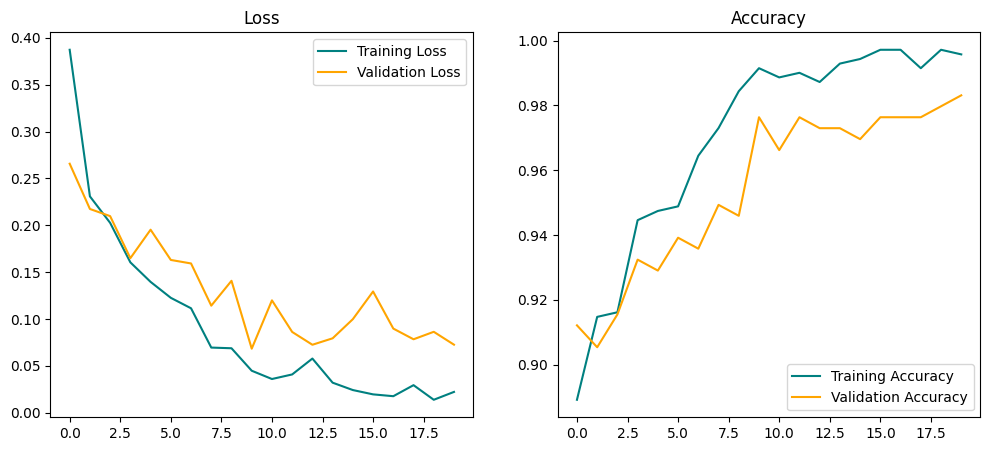

In [64]:
# 8. Plot training and validation loss and accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'], label='Training Loss', color='teal')
plt.plot(hist.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.history['accuracy'], label='Training Accuracy', color='teal')
plt.plot(hist.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Accuracy')
plt.legend()

plt.show()

In [65]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy # type: ignore

In [66]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [67]:
for batch in val.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 79ms/step


In [68]:
print(f'Precision: {pre.result().numpy():.4f}')
print(f'Recall: {re.result().numpy():.4f}')
print(f'Accuracy: {acc.result().numpy():.4f}')

Precision: 0.9062
Recall: 0.9062
Accuracy: 0.9797


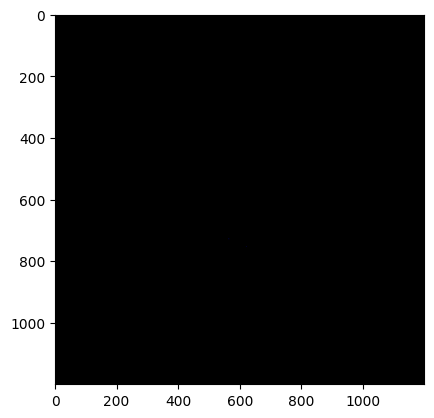

In [78]:

import cv2
img = cv2.imread('strike_data/false/2025-05-15T23_00_00Z_8e39__-75.5448_4.3198_0.png')
if img is not None:
	img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
	plt.imshow(img_rgb)
	plt.show()
else:
	print("Image not found or unable to load.")

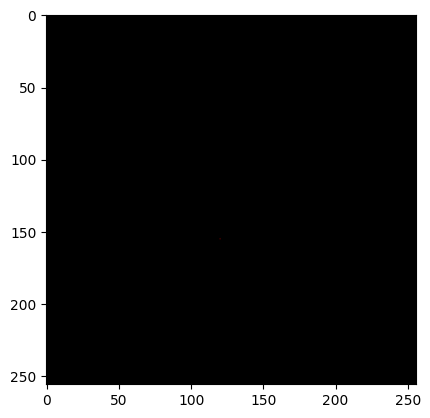

In [79]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [80]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 23ms/step


In [81]:
if yhat > 0.5: 
    print(f'Predicted class is True')
else:
    print(f'Predicted class is False')

Predicted class is False
